# Study to identify how the percentiles and safe distance (SD) affect the amount of elements turned off in the California grid

## This study is done for probablisic wildfire data obtained from Pyrecast

In [1]:
from Make_fig_funtions import *
from Con_file_functions import extract_WF_dir_info, ID_percentiles_in_WF_dir

In [2]:
# The directory containing all of the wildfire data from Pyrecast
WF_dir = "./wildfires/Eaton"


In [3]:
# Find all the possible percentiles in the WF_dir.
# The info does not have anything to do with this.
_, possible_percentiles = extract_WF_dir_info(WF_dir, print_con_file_details = False)

The different percentile from the shp file:
[ 1  5 10 20 30 40 50 60 70 75 80 85 90 95 99]


In [4]:
# The percentiles we want to vizualize
percentiles = [1, 30, 50, 70, 99]

# Remove the percentiles that are not possible
percentiles = ID_percentiles_in_WF_dir(percentiles, possible_percentiles)

# The new set of percentiles
print(percentiles)


All the percentiles belong in the set of possible percentiles
[1, 30, 50, 70, 99]


### Visualize the different area of the wildfire by percentiles

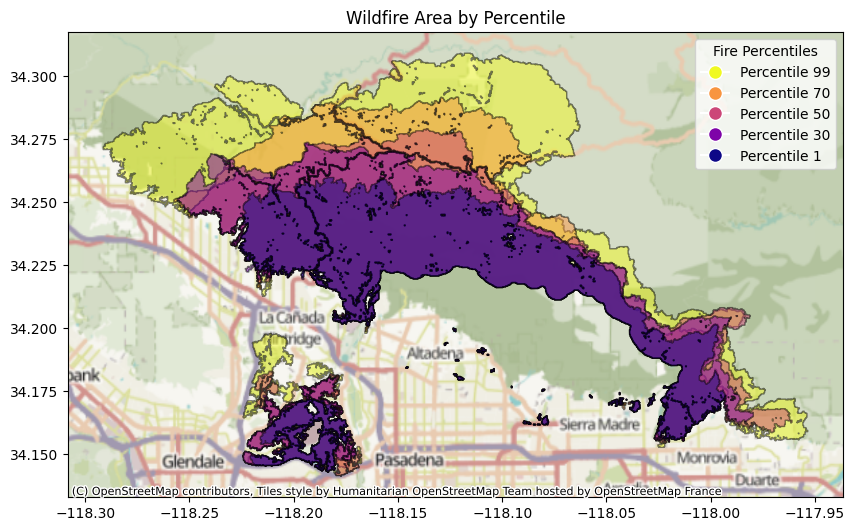

In [5]:
Make_WF_fig_Areas(percentiles, WF_dir)

### Visualize the different perimeter of the wildfire by percentiles

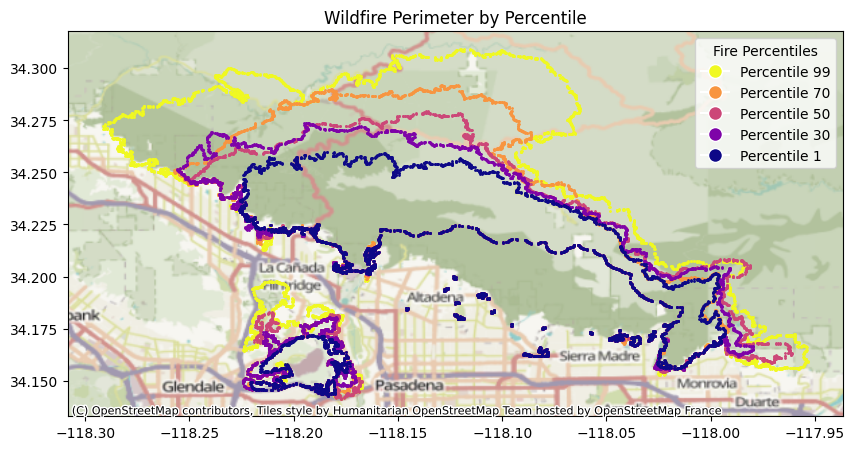

In [6]:
Make_WF_fig_Perimeter(percentiles, WF_dir)

### The test to see how much element of the grid are turned off by varrying the percentiles and SDs

In [7]:
# The required California grid data
CATS_lines_dir = "./grids/California/CATS_lines.json"
CATS_transformer_dir = "./grids/California/California_transformer.csv"
CATS_gens_dir = "./grids/California/CATS_gens.csv"
CATS_buses_dir = "./grids/California/CATS_buses.csv"

In [8]:
# The choice of different distances
SD = [2, 4]

# The choice of percentiles
percentiles = [1, 50]

# Ensuring the percentiles are possible
percentiles = ID_percentiles_in_WF_dir(percentiles, possible_percentiles)


All the percentiles belong in the set of possible percentiles


### $$\textcolor{red}{\textbf{Warning}}$$ Running the function Off_info_vai_SD_Percent can take a signicatly amount of time. 

In [9]:
df = Off_info_vai_SD_Percentile(WF_dir, CATS_lines_dir, CATS_transformer_dir, CATS_gens_dir, SD, percentiles)

Finished calculating infomation for percentile: 1 with SD: 2
Finished calculating infomation for percentile: 1 with SD: 4
Finished calculating infomation for percentile: 50 with SD: 2
Finished calculating infomation for percentile: 50 with SD: 4


### Visualization of the off data

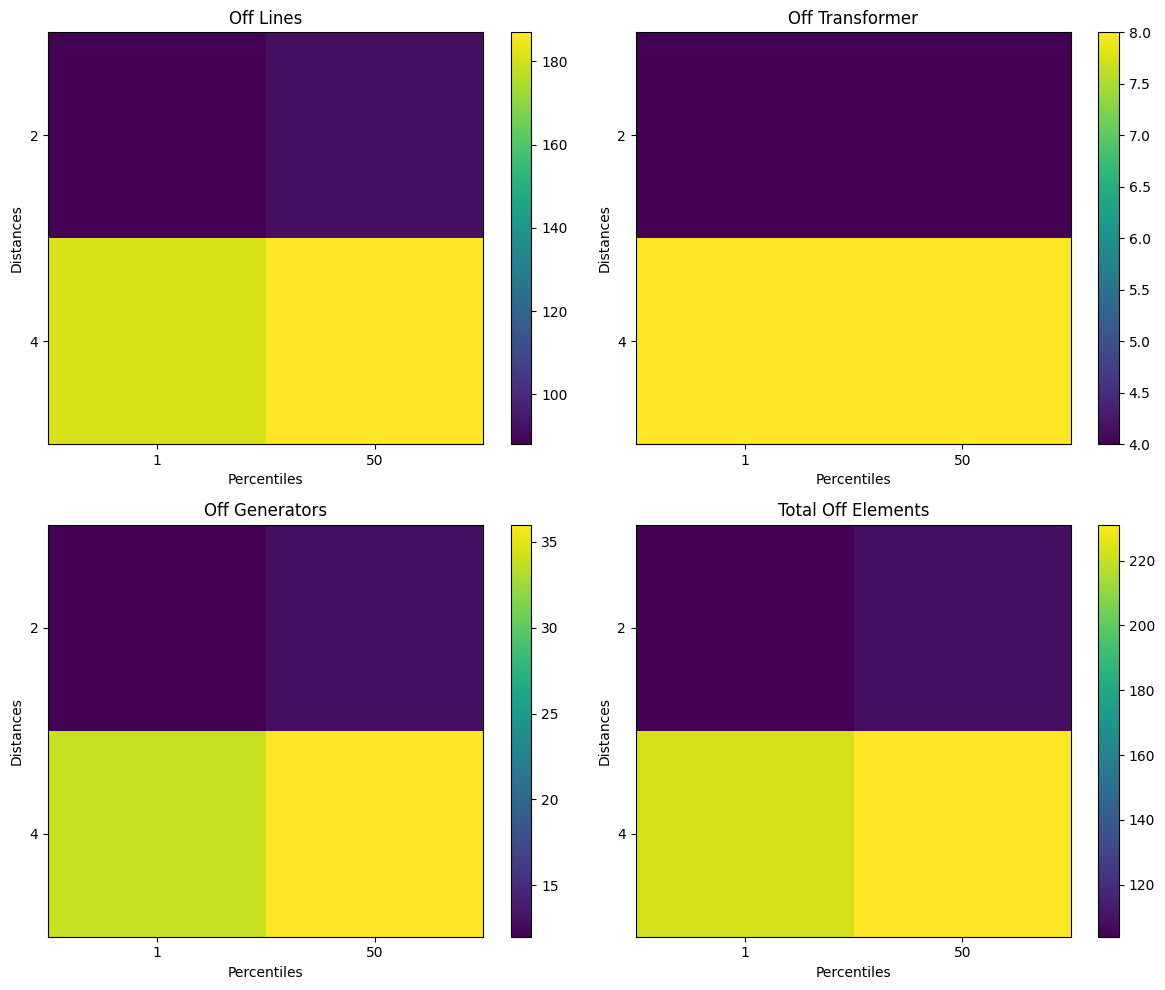

In [10]:
Make_off_info_plot_from_CSV(df)

### Vizualization of the off elments on the grid

### To create the figures for all of the different combination of percentiles and SD.

Make_Series_of_figs_near_WF(percentiles, SD, WF_dir, CATS_buses_dir, CATS_gens_dir, CATS_lines_dir, ylim = [34, 34.5], xlim= [-118.6, -117.8])

### Instead you can fix ether percentile and vary SD or vice versa

### Example of fixing percentile to 50 and varying SD. Then saving the figures.

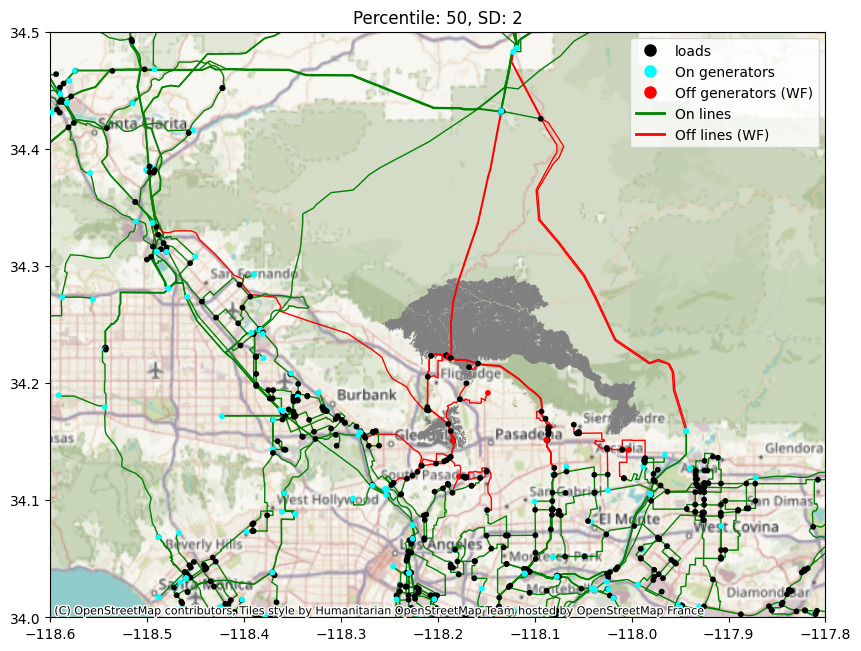

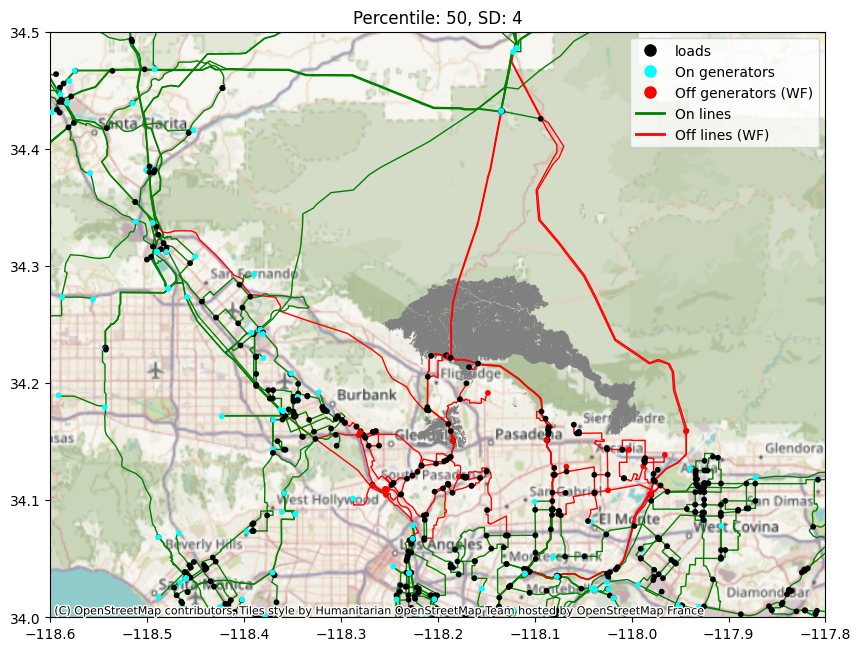

In [13]:
Vary_SD_fig_dir = "WF_fig/Eaton/Vary_SD"
Make_Series_of_figs_near_WF_vary_Percentiles_SD(50, SD, WF_dir, CATS_buses_dir, CATS_gens_dir, CATS_lines_dir, ylim = [34, 34.5], xlim= [-118.6, -117.8],  save_fig =True, fig_dir = Vary_SD_fig_dir)

### Example of fixing SD to 2 and varying percentiles. Then saving the figures.

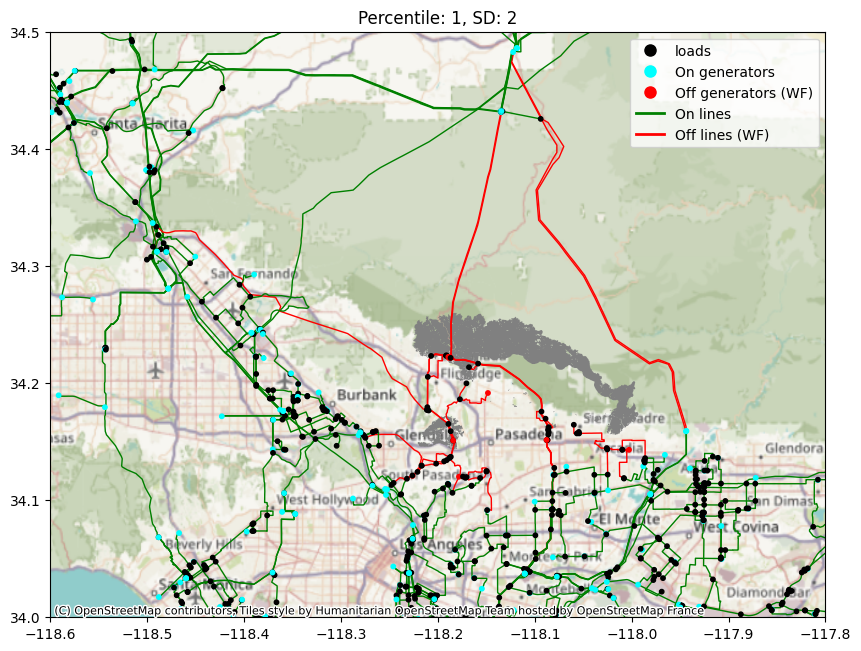

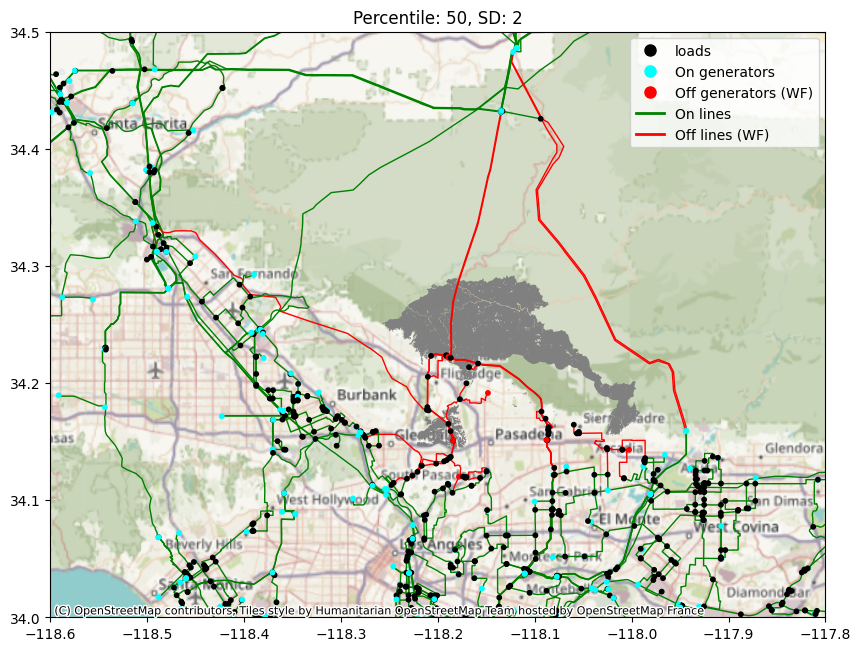

In [12]:
Vary_Per_fig_dir = "WF_fig/Eaton/Vary_Percentile"
Make_Series_of_figs_near_WF_vary_Percentiles_SD(percentiles, 2, WF_dir, CATS_buses_dir, CATS_gens_dir, CATS_lines_dir, ylim = [34, 34.5], xlim= [-118.6, -117.8], save_fig =True, fig_dir = Vary_Per_fig_dir)